In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
hotel_df = pd.read_csv('hotel_bookings.csv')

In [165]:
hotel_df.head(8)
# agent and company appear to have missing values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03


In [166]:
hotel_df.dtypes
# object should be changed to str type

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [167]:
hotel_df.columns[hotel_df.isna().any()].tolist()  # columns containing null values

['children', 'country', 'agent', 'company']

In [168]:
hotel_df['company'].isnull().sum()

112593

In [169]:
hotel_df.shape

(119390, 32)

In [170]:
# most of the values for the company column are missing. May need to drop the entire column

In [171]:
hotel_df['agent'].isnull().sum()

16340

In [172]:
hotel_df['agent'].isnull()

0          True
1          True
2          True
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: agent, Length: 119390, dtype: bool

In [173]:
hotel_df['children'].isnull().sum()

4

In [174]:
hotel_df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [175]:
# there's quite a bit of NaN values for agent so fill with 0 to represent direct bookings or unknown

In [176]:
# only 4 missing children values; can fill with average

In [177]:
hotel_df['country'].isnull().sum()

488

In [178]:
# can fill with most common country

In [179]:
# drop company column
hotel_df.drop(columns = 'company', inplace= True)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [180]:
# fill in agent values
hotel_df['agent'] = hotel_df['agent'].fillna(value=0)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [181]:
# fill in children value with avg
hotel_df['children'] = hotel_df['children'].fillna(hotel_df['children'].mean())

In [182]:
hotel_df['children'].isnull().sum()

0

In [183]:
hotel_df['country'].mode()

0    PRT
Name: country, dtype: object

In [184]:
hotel_df['country'] = hotel_df['country'].fillna(value = 'PRT') # mode
hotel_df['country'].isnull().sum()

0

In [185]:
hotel_df.isnull().sum() # handled all missing values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [186]:
## change datatypes ##
# Identify all object-type columns
object_cols = hotel_df.select_dtypes(include='object').columns

# Convert them to pandas 'string' dtype (preserves NaNs)
hotel_df[object_cols] = hotel_df[object_cols].astype('string')

hotel_df.dtypes

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [187]:
# change reservation status date to datetime

hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')
hotel_df.dtypes

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [188]:
hotel_df['adults'] = hotel_df['adults'].astype('float64')
hotel_df['babies'] = hotel_df['babies'].astype('float64')
hotel_df.dtypes

hotel                             string[python]
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                string[python]
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                   float64
children                                 float64
babies                                   float64
meal                              string[python]
country                           string[python]
market_segment                    string[python]
distribution_channel              string[python]
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                string[python]
assigned_room_type  

In [189]:
## feature engineering ##
hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [190]:
hotel_df['stay_duration'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stay_duration
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7


In [191]:
## EXPLORATORY DATA ANALYSIS ##

In [192]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,stay_duration
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104,1.968242,3.427900
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,2.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,2.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,55.000000,69.000000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798,NaN,0.722396,2.557439


In [193]:
popular_hotel_df = hotel_df.groupby(['hotel', 'reservation_status']).size() 
# using size instead of count because count gives me values for EVERY column but I only want corresponding values from hotel and reservation status
popular_hotel_df = popular_hotel_df.reset_index(name= 'count') # flattens the df out to make it easier to interpret for visualization
display(popular_hotel_df)

,hotel,reservation_status,count
0,City Hotel,Canceled,32186
1,City Hotel,Check-Out,46228
2,City Hotel,No-Show,916
3,Resort Hotel,Canceled,10831
4,Resort Hotel,Check-Out,28938
5,Resort Hotel,No-Show,291


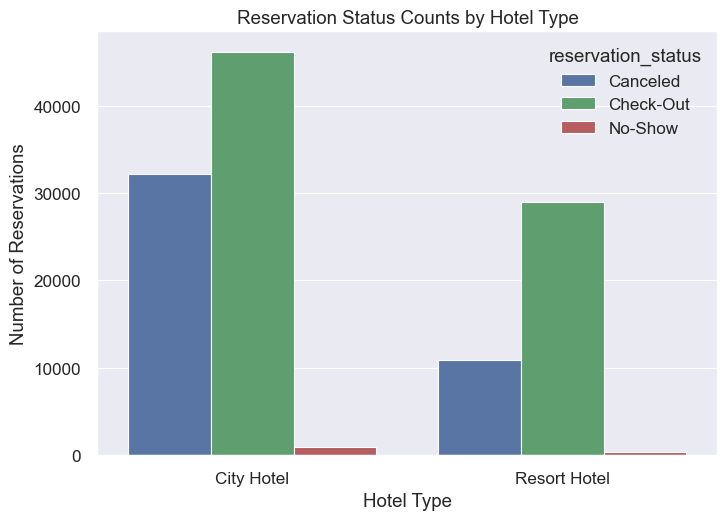

In [194]:
# Visualize which hotel is more popular (has more check-outs and less canceled + no show)
sns.barplot(data=popular_hotel_df, x='hotel', y='count', hue='reservation_status')
plt.title('Reservation Status Counts by Hotel Type')
plt.ylabel('Number of Reservations')
plt.xlabel('Hotel Type')
plt.show()


In [195]:
# city hotel is more popular with more completed reservations (check-ins ans outs) and more overall reservations

In [196]:
# Filter for only completed check-out bookings 
checkout_df = hotel_df[hotel_df['reservation_status'] == 'Check-Out']

# Group by month and count
month_checkouts = checkout_df.groupby('arrival_date_month').size().reset_index(name='count')
display(month_checkouts)

# sort in descending order
month_checkouts = month_checkouts.sort_values(by='count', ascending=False)
display(month_checkouts)


,arrival_date_month,count
0,April,6565
1,August,8638
2,December,4409
3,February,5372
4,January,4122
5,July,7919
6,June,6404
7,March,6645
8,May,7114
9,November,4672


,arrival_date_month,count
1,August,8638
5,July,7919
8,May,7114
10,October,6914
7,March,6645
0,April,6565
6,June,6404
11,September,6392
3,February,5372
9,November,4672


C:\Users\gadda\AppData\Local\Temp\ipykernel_22984\1315371796.py:6: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(month, count, linestyle = 'solid')


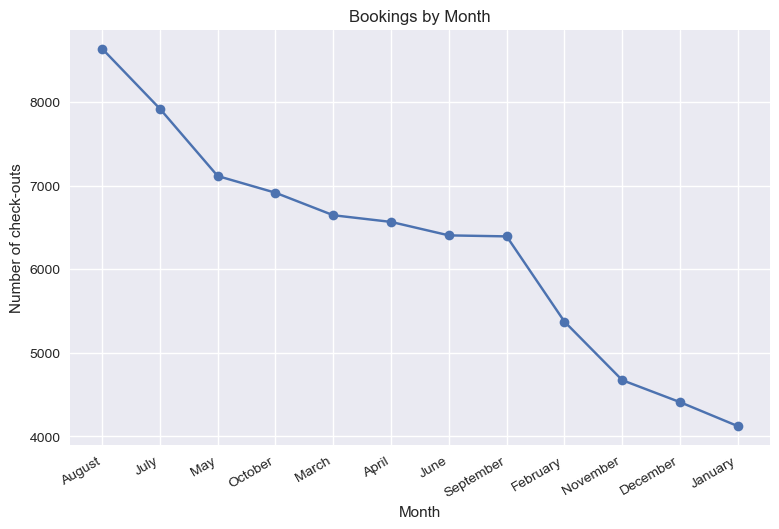

In [197]:
# visualization over time

month = month_checkouts['arrival_date_month']
count = month_checkouts['count']
plt.style.use('seaborn-v0_8')
plt.plot_date(month, count, linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of check-outs')

plt.tight_layout()

plt.show()

In [198]:
# May, July, and August are the most popular months with most reservations

In [199]:
# factors most impacting cancellation
object_cols = hotel_df.select_dtypes(include='object').columns
cancel_df = hotel_df.drop(columns = object_cols)
cancel_df = cancel_df[hotel_df['reservation_status'] == 'Canceled']
cancel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,stay_duration
count,43017.0,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,...,43017.000000,43017.000000,43017.000000,43017.000000,43017.000000,43017.0,43017.000000,43017,43017.000000,43017.000000
mean,1.0,147.308622,2016.173094,27.402864,15.692656,0.920497,2.560453,1.908432,0.106177,0.003743,...,0.022596,0.094567,68.524351,3.664086,105.205241,0.0,0.323105,2016-06-09 09:13:12.607573504,2.018351,3.480949
min,1.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2014-10-17 00:00:00,0.000000,0.000000
25%,1.0,51.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,72.900000,0.0,0.000000,2015-12-18 00:00:00,2.000000,2.000000
50%,1.0,116.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,96.300000,0.0,0.000000,2016-06-09 00:00:00,2.000000,3.000000
75%,1.0,219.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,96.000000,0.000000,127.830000,0.0,0.000000,2017-01-02 00:00:00,2.000000,4.000000
max,1.0,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,3.000000,2.000000,...,58.000000,16.000000,531.000000,391.000000,5400.000000,0.0,5.000000,2017-08-26 00:00:00,55.000000,56.000000
std,0.0,118.829882,0.716109,13.016835,8.775822,1.000210,1.849113,0.679961,0.408668,0.061820,...,0.645330,0.443143,102.244150,21.779752,52.747471,0.0,0.644719,NaN,0.801343,2.480295


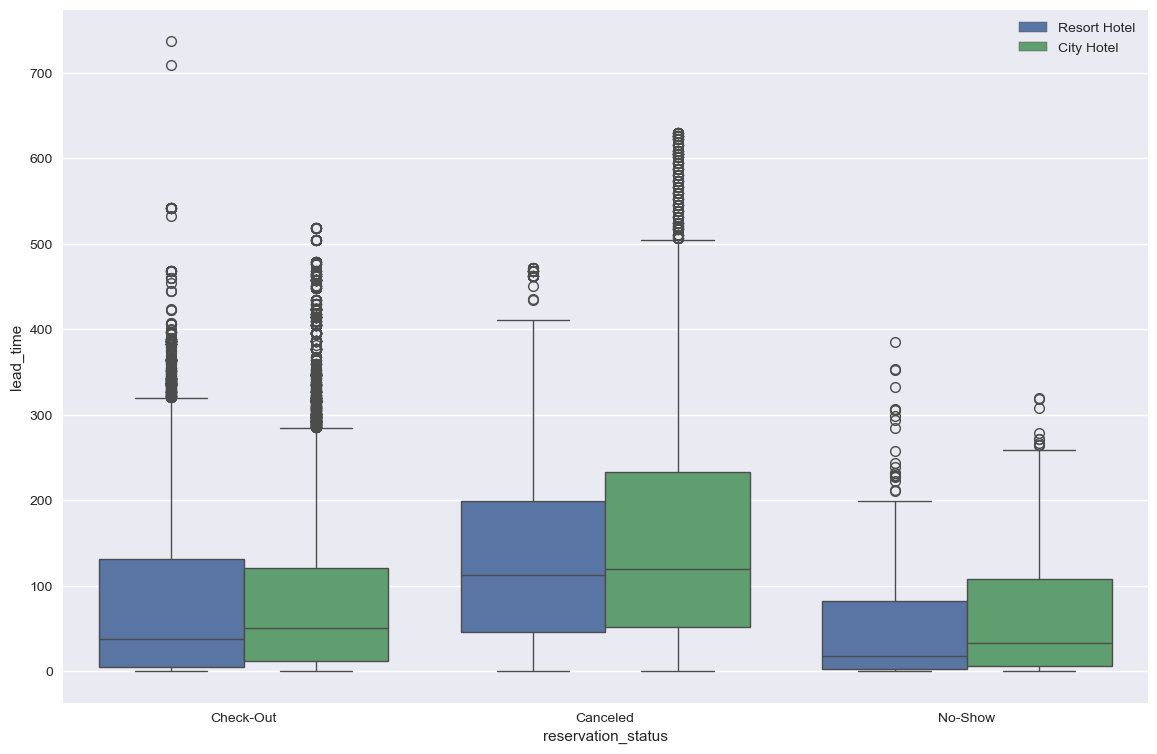

In [200]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

sns.boxplot(x='reservation_status',y='lead_time',data=hotel_df, hue='hotel')

# Moves legend to the best position
plt.legend(loc=0)

In [201]:
# the longer the lead time the greater number of cancellations

In [202]:
display(cancel_df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stay_duration
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2.0,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,2.0,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2.0,...,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,2.0,4
27,Resort Hotel,1,60,2015,July,27,1,2,5,2.0,...,240.0,0,Transient,107.0,0,2,Canceled,2015-05-11,2.0,7
32,Resort Hotel,1,96,2015,July,27,1,2,8,2.0,...,0.0,0,Transient,108.3,0,2,Canceled,2015-05-29,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,City Hotel,1,13,2017,May,22,29,1,2,1.0,...,0.0,0,Transient,95.0,0,0,Canceled,2017-05-17,1.0,3
108000,City Hotel,1,13,2017,May,22,29,1,2,1.0,...,0.0,0,Transient,95.0,0,0,Canceled,2017-05-17,1.0,3
110280,City Hotel,1,132,2017,April,17,25,0,0,0.0,...,9.0,0,Transient,0.0,0,3,Canceled,2017-04-25,0.0,0
111355,City Hotel,1,4,2017,June,23,5,1,0,1.0,...,0.0,0,Transient,65.0,0,0,Canceled,2017-06-05,1.0,1


In [203]:
cancel_df.drop(columns = ['hotel','customer_type', 'meal', 'country', 'market_segment', 'distribution_channel', 
                        'reserved_room_type', 'assigned_room_type', 'deposit_type'] , inplace=True)


In [204]:
display(cancel_df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stay_duration
8,1,85,2015,July,27,1,0,3,2.0,0.0,...,0,240.0,0,82.0,0,1,Canceled,2015-05-06,2.0,3
9,1,75,2015,July,27,1,0,3,2.0,0.0,...,0,15.0,0,105.5,0,0,Canceled,2015-04-22,2.0,3
10,1,23,2015,July,27,1,0,4,2.0,0.0,...,0,240.0,0,123.0,0,0,Canceled,2015-06-23,2.0,4
27,1,60,2015,July,27,1,2,5,2.0,0.0,...,0,240.0,0,107.0,0,2,Canceled,2015-05-11,2.0,7
32,1,96,2015,July,27,1,2,8,2.0,0.0,...,0,0.0,0,108.3,0,2,Canceled,2015-05-29,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,1,13,2017,May,22,29,1,2,1.0,0.0,...,0,0.0,0,95.0,0,0,Canceled,2017-05-17,1.0,3
108000,1,13,2017,May,22,29,1,2,1.0,0.0,...,0,0.0,0,95.0,0,0,Canceled,2017-05-17,1.0,3
110280,1,132,2017,April,17,25,0,0,0.0,0.0,...,1,9.0,0,0.0,0,3,Canceled,2017-04-25,0.0,0
111355,1,4,2017,June,23,5,1,0,1.0,0.0,...,0,0.0,0,65.0,0,0,Canceled,2017-06-05,1.0,1


In [206]:
cancel_df.drop(columns = 'arrival_date_month', inplace = True)

In [213]:
cancel = cancel_df.drop(columns = ['reservation_status', 'reservation_status_date'])

In [214]:
display(cancel)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
8,1,85,2015,27,1,0,3,2.0,0.0,0.0,...,0,0,0,240.0,0,82.0,0,1,2.0,3
9,1,75,2015,27,1,0,3,2.0,0.0,0.0,...,0,0,0,15.0,0,105.5,0,0,2.0,3
10,1,23,2015,27,1,0,4,2.0,0.0,0.0,...,0,0,0,240.0,0,123.0,0,0,2.0,4
27,1,60,2015,27,1,2,5,2.0,0.0,0.0,...,0,0,0,240.0,0,107.0,0,2,2.0,7
32,1,96,2015,27,1,2,8,2.0,0.0,0.0,...,0,0,0,0.0,0,108.3,0,2,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,1,13,2017,22,29,1,2,1.0,0.0,0.0,...,1,1,0,0.0,0,95.0,0,0,1.0,3
108000,1,13,2017,22,29,1,2,1.0,0.0,0.0,...,1,1,0,0.0,0,95.0,0,0,1.0,3
110280,1,132,2017,17,25,0,0,0.0,0.0,0.0,...,0,0,1,9.0,0,0.0,0,3,0.0,0
111355,1,4,2017,23,5,1,0,1.0,0.0,0.0,...,0,4,0,0.0,0,65.0,0,0,1.0,1


<Axes: >

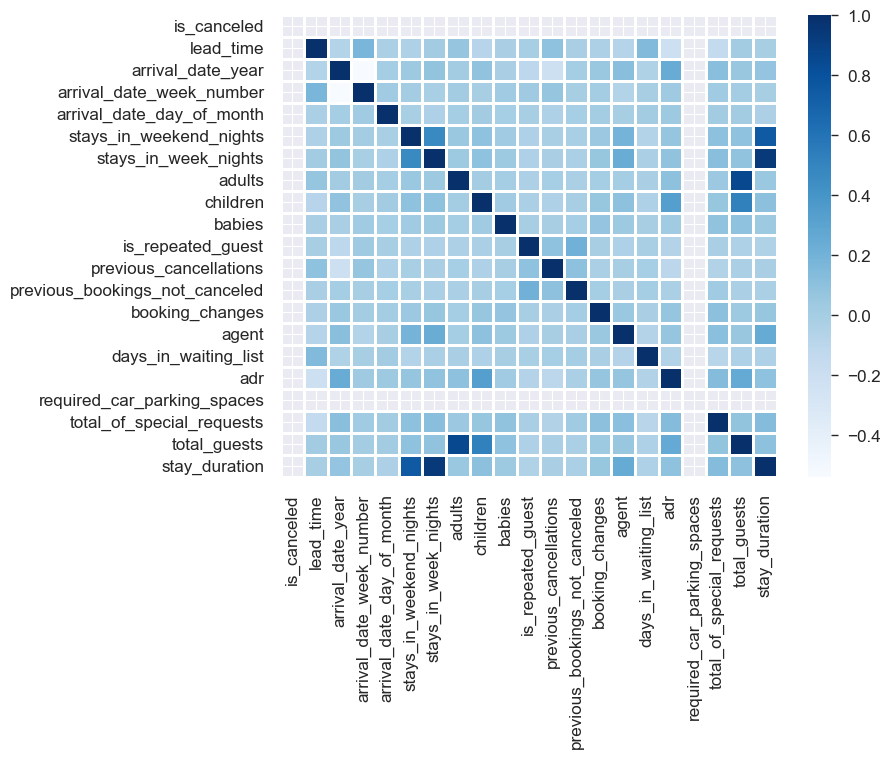

In [218]:
## Visualizing factors influencing cancellation status (numerical categories)

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
correlation_matrix = cancel.corr()

sns.heatmap(correlation_matrix, cmap='Blues', linecolor='white', linewidth=1)